# **AIN 214 - PA4 - FALL 2024**




**Student Number** : 2220765032

**Name Surname**   : Yiğit Kaya Bağcı


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 13.12.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **Building kNN and Logistic Regression Classifiers**

---
**Dataset Path:** "Data/stroke.csv"
---

We will deal with the stroke dataset. The dataset contains demographic and health-related data to predict whether a patient is likely to have a stroke.

**Features:**


* id: Unique identifier (can be ignored for modeling).
* gender: Gender of the patient (categorical).
* age: Age of the patient (numerical).
* hypertension: Whether the patient has hypertension (0 = No, 1 = Yes).
* heart_disease: Whether the patient has heart disease (0 = No, 1 = Yes).
* ever_married: Marital status (categorical).
* work_type: Type of work (categorical).
* Residence_type: Rural or Urban (categorical).
* avg_glucose_level: Average glucose level (numerical).
* bmi: Body Mass Index (numerical).
* smoking_status: Smoking habits (categorical).
* stroke: Target variable (1 = Stroke, 0 = No Stroke).

# **Necessary Imports**

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import random
from imblearn.over_sampling import SMOTE
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score
import numpy as np

# **PART- 1: Data Preprocessing and Visualization (35 Pts)**

---

## 1.1. Explaratory Data Analysis (20 Pts)

* Load the dataset
* Check and Handle Missing Values

  * Identify columns with missing values.
  * Replace missing values using suitable methods (mean or median imputation).

* Check and Handle Outliers

  * Detect outliers in numerical features
  * Handle outliers appropriately

* Convert categorical variables into numerical values.
* Perform data normalization



In [4]:
# load the dataset
path = "Data/stroke.csv"
stroke_df = pd.read_csv(path)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# missing values count
missing_values = stroke_df.isna().sum()
print("Missing Values:")
print()
missing_values

Missing Values:



,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [6]:
# Since there are no missing categorical values, we don't need to use mode imputation.
# For the numerical missing value, we can use median or mean imputation.

# To avoid being overly affected by outliers, I will fill the missing 'bmi' value using the median.
# Imputation process
stroke_df['bmi'] = stroke_df['bmi'].fillna(stroke_df['bmi'].median())


# To check missing values
missing_values = stroke_df.isna().sum()

missing_values

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [8]:
# Columns to detect and handle outliers for numerical data
outlier_cols = ['age', 'avg_glucose_level', 'bmi']

# Dictionary to store outliers for each column
outlier_memory = {}

# New cleaned data.
clean_df = stroke_df.copy()

# Outlier dedection and clean from outliers.

# Detect and handle outliers using IQR method
for col in outlier_cols:
    # Calculate Q1, Q3, and IQR
    quartile1 = stroke_df[col].quantile(0.25)  # 25th percentile
    quartile3 = stroke_df[col].quantile(0.75)  # 75th percentile
    IQR = quartile3 - quartile1  # Interquartile Range

    # Identify outliers directly using the condition
    condition = (stroke_df[col] < (quartile1 - 1.5 * IQR)) | (stroke_df[col] > (quartile3 + 1.5 * IQR))
    outliers = stroke_df[condition]

    # Store outliers in the dictionary
    outlier_memory[col] = outliers

    # Remove outliers from the cleaned DataFrame
    clean_df = clean_df.loc[~condition]

In [ ]:
# Showing outliers

outlier_memory['age'].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [9]:
# Showing outliers

outlier_memory['avg_glucose_level']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,68967,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,66684,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


In [10]:
# Showing outliers

outlier_memory["bmi"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,17004,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4906,72696,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,16245,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,40732,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,38349,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0


In [11]:
# Encoding the categorical features

# For Categorical Variables, applying One-Hot Encoding
clean_df = pd.get_dummies(clean_df, columns=['gender', 'ever_married', 'Residence_type'], drop_first=True)
clean_df = pd.get_dummies(clean_df, columns=['work_type', 'smoking_status'], drop_first=False)

clean_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,False,False,True,False,False,False,False,True,False
6,53882,74.0,1,1,70.09,27.4,1,True,False,True,False,False,False,True,False,False,False,False,True,False
7,10434,69.0,0,0,94.39,22.8,1,False,False,False,True,False,False,True,False,False,False,False,True,False
8,27419,59.0,0,0,76.15,28.1,1,False,False,True,False,False,False,True,False,False,True,False,False,False
9,60491,78.0,0,0,58.57,24.2,1,False,False,True,True,False,False,True,False,False,True,False,False,False


In [12]:
# Data Normalization by using MinMaxScaler

numerical_cols = ['age', 'avg_glucose_level', 'bmi']

max_min_scaler = MinMaxScaler()
clean_df[numerical_cols] = max_min_scaler.fit_transform(clean_df[numerical_cols])

clean_df.tail()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5105,18234,0.975586,1,0,0.252113,0.481375,0,False,False,True,True,False,False,True,False,False,False,False,True,False
5106,44873,0.987793,0,0,0.617119,0.822350,0,False,False,True,True,False,False,False,True,False,False,False,True,False
5107,19723,0.426270,0,0,0.245421,0.553009,0,False,False,True,False,False,False,False,True,False,False,False,True,False
5108,37544,0.621582,0,0,0.978954,0.409742,0,True,False,True,False,False,False,True,False,False,False,True,False,False
5109,44679,0.536133,0,0,0.265586,0.426934,0,False,False,True,True,True,False,False,False,False,True,False,False,False


## 1.2. Data Visualization (10 Pts)

* Visualize the distribution of numerical features
* Analyze the relationship between categorical features (e.g., gender, work_type) and the target variable (stroke).
* Plot a correlation heatmap to analyze their relationships.
* Comment on any findings

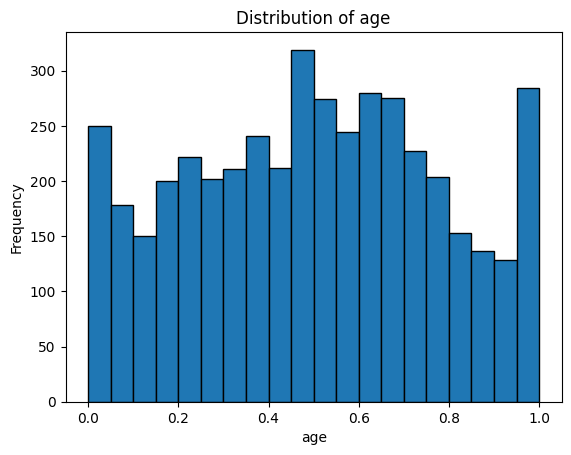

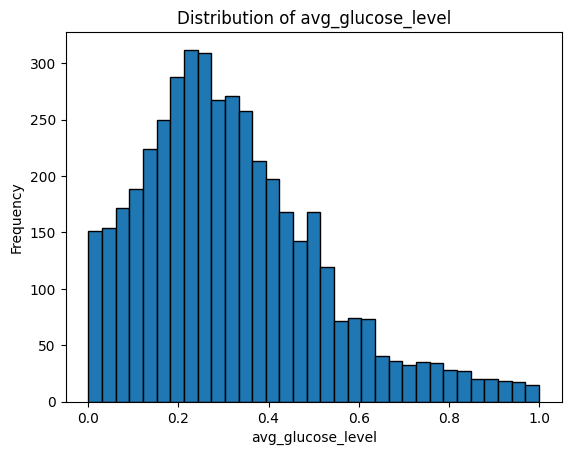

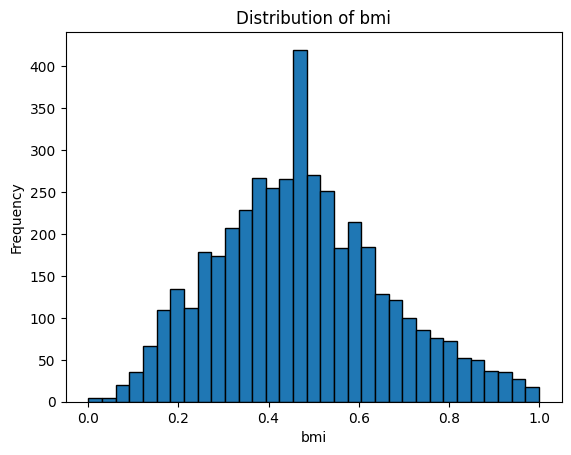

In [13]:
# Visualize the distribution of numerical features

numerical_values = ["age", "avg_glucose_level", "bmi"]

for numerical_column in numerical_values:
  plt.hist(clean_df[numerical_column], bins = 'auto', edgecolor = 'black')
  plt.xlabel(numerical_column)
  plt.ylabel('Frequency')
  plt.title("Distribution of " + numerical_column)
  plt.show()

In [ ]:
# By looking histogram's we can say that disturbution of age is perfectly balanced,
# distribution of glucose_level focused on 0.25 value and distribution of bmi focused on middle bmi value.

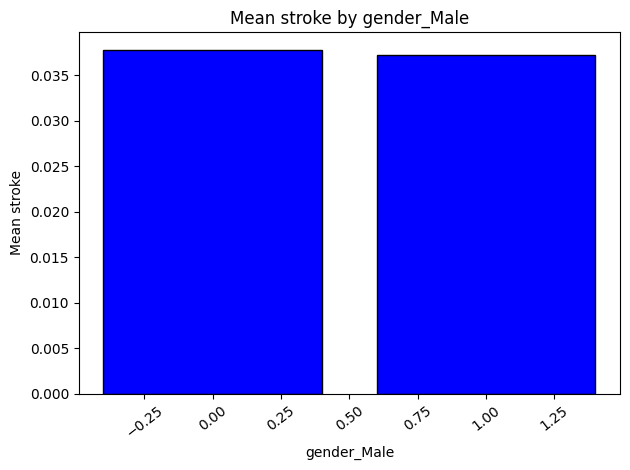

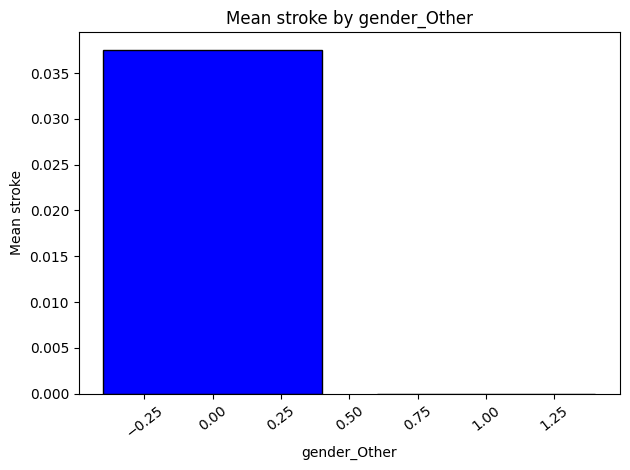

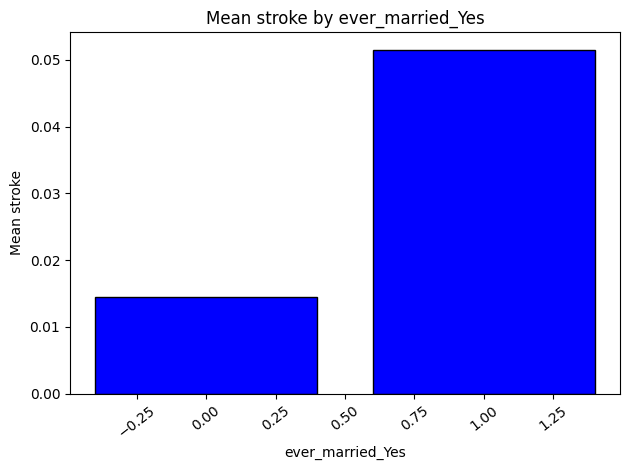

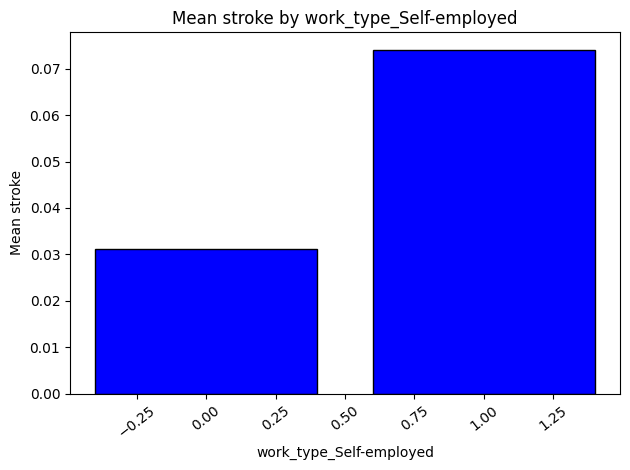

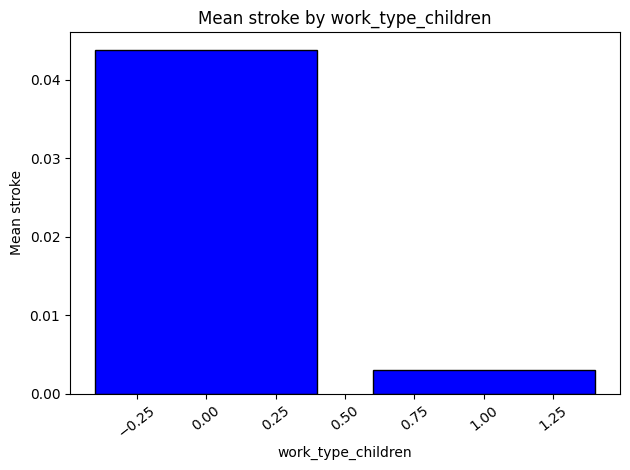

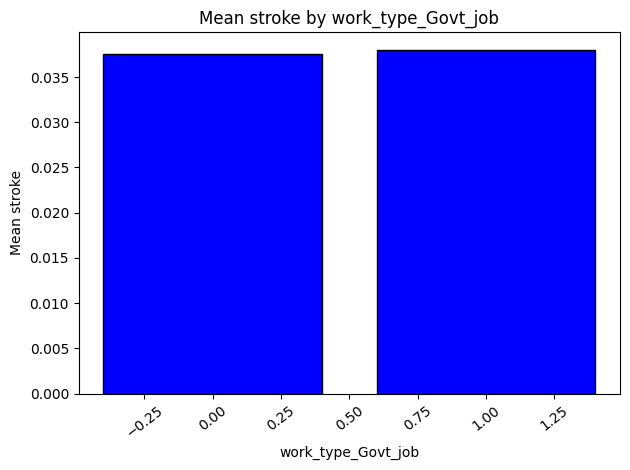

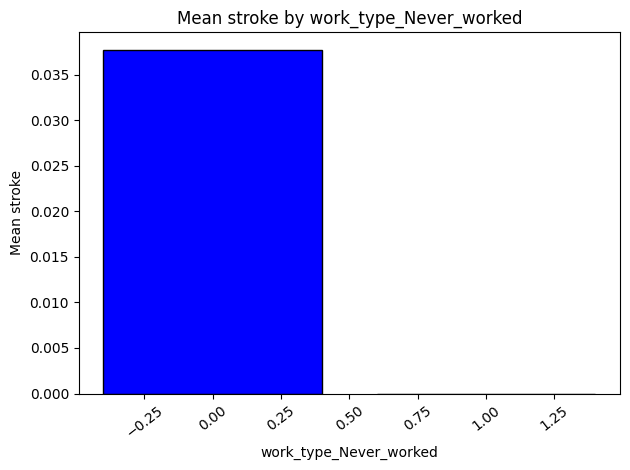

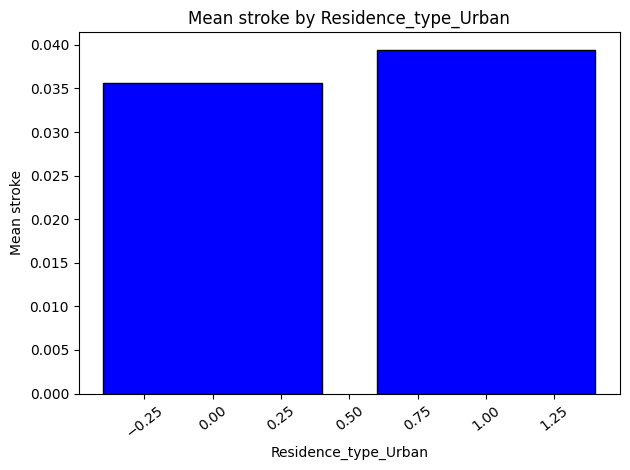

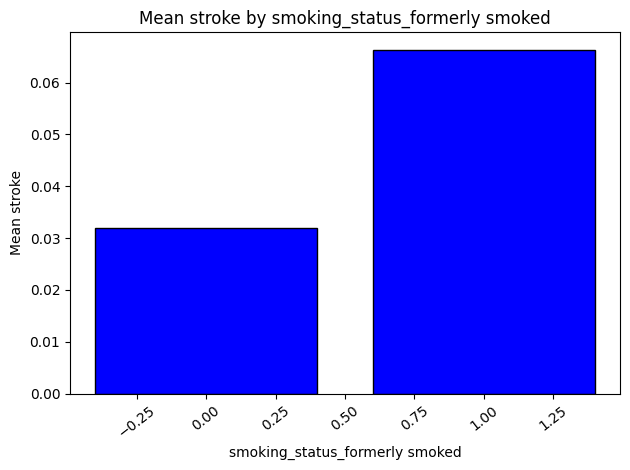

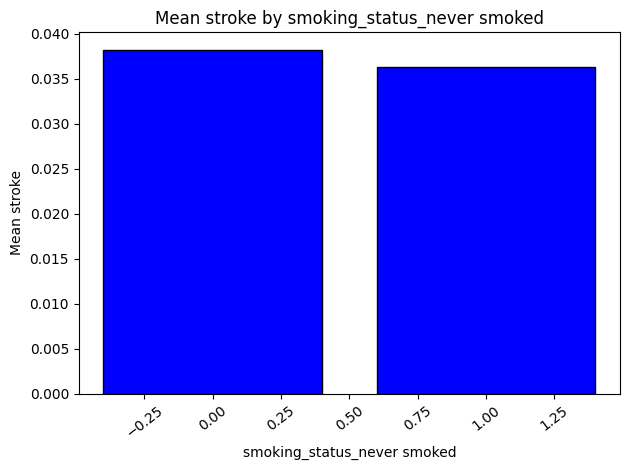

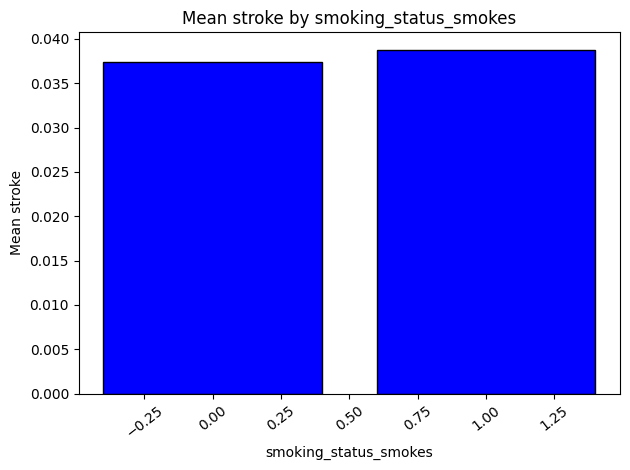

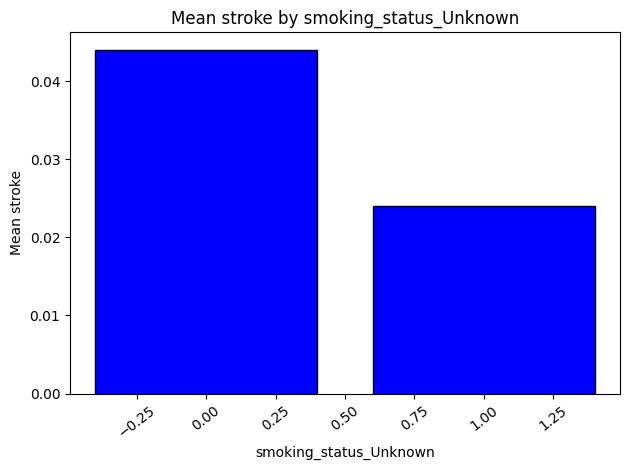

In [14]:
# Analyzing the relationship between categorical columns and target column.

# Categorical columns and target column
categoricals = ['gender_Male', 'gender_Other', 'ever_married_Yes',
                        'work_type_Self-employed', 'work_type_children', 'work_type_Govt_job',
                        'work_type_Never_worked', 'Residence_type_Urban',
                        'smoking_status_formerly smoked', 'smoking_status_never smoked',
                        'smoking_status_smokes', 'smoking_status_Unknown']
target = 'stroke'

# Loop through categorical columns and plot bar charts for mean stroke values
for col in categoricals:
    # Calculate the mean stroke for each category
    category_means = clean_df.groupby(col)[target].mean()

    # Plot the bar chart
    plt.bar(category_means.index, category_means.values, color='blue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel(f"Mean {target}")
    plt.title(f"Mean {target} by {col}")
    plt.xticks(rotation=38)
    plt.tight_layout()
    plt.show()

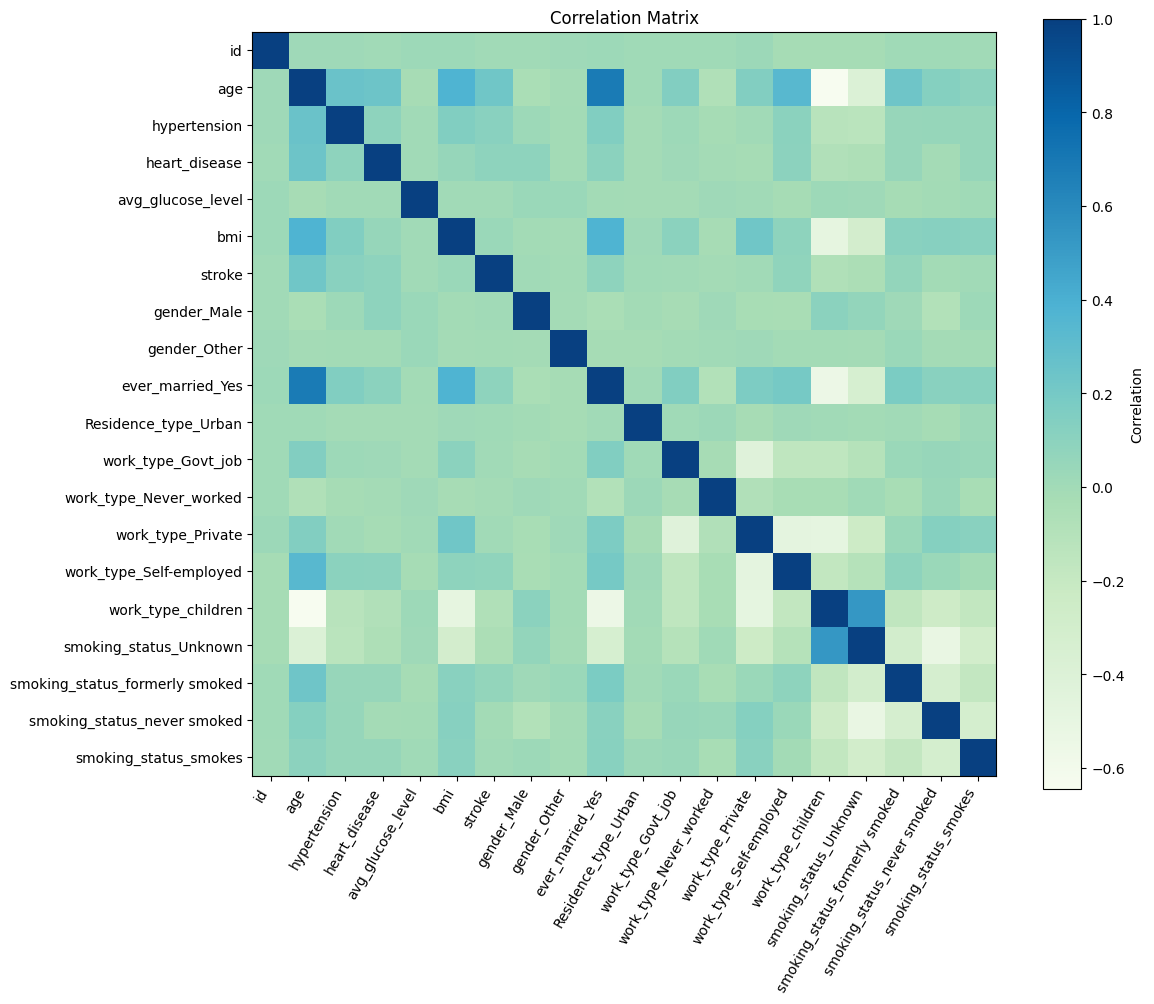

In [17]:
# Heatmap to analyzing relationships.

# Calculate correlation matrix
corr_matrix = clean_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='GnBu', interpolation='nearest')
plt.xticks(ticks = range(len(corr_matrix.columns)), labels = corr_matrix.columns, rotation=60, ha='right')
plt.yticks(ticks = range(len(corr_matrix.columns)), labels = corr_matrix.columns)
plt.colorbar(label="Correlation")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
"""
From the graphs, we can see some simple patterns. People who have been married seem to have a
higher chance of having a stroke compared to those who have never been married.
Self-employed people also have a higher stroke rate compared to others,
while people working with children have a much lower rate. Smoking seems to affect stroke risk as well.
People who used to smoke have a higher chance of stroke compared to those who never smoked.

For the new graphs, current smokers have a stroke rate similar to those who never smoked,
which is surprising. However, people with an unknown smoking status seem to have a higher
stroke rate compared to others. This suggests there may be other factors related
to the unknown smoking group that influence stroke risk. Gender and whether someone lives in
an urban or rural area still do not seem to make much difference in stroke risk.
"""

## 1.3. Data Splitting (5 Pts)

* Manually split the dataset into training (70%) and testing (30%) sets
* Shuffle and split the data
* Avoid using predefined functions like train_test_split for this task


In [18]:
# Random seed for reproducibility
my_seed = 80

def shuffle_and_split_data(df, train_rate=0.7):
    # Shuffle DataFrame
    random.seed(my_seed)
    shuffled_indices = random.sample(range(len(df)), len(df))
    shuffled_df = df.iloc[shuffled_indices].reset_index(drop=True)

    # Split into train and test sets
    train_size = int(len(shuffled_df) * train_rate)
    train_df = shuffled_df.iloc[:train_size]
    test_df = shuffled_df.iloc[train_size:]

    return train_df, test_df

# **PART- 2: Model Building (30 points)**

Implement two classification models:

* k-Nearest Neighbors (kNN)
* Logistic Regression


***You can use scikit-learn***




## 2.1. kNN Classifier (15 Pts)
* Build and train the kNN model
* Choose the optimal k value using Minkowski distance with at least two different values for p


In [ ]:
# First we are balancing the data with using STOME

# Label's
X = clean_df.drop('stroke', axis=1)
y = clean_df['stroke']

# Appyling SMOTE to all data.
smote = SMOTE(random_state=40)
balanced_x, balanced_y = smote.fit_resample(X, y)

# Compress the balanced data.
balanced_df = pd.concat([balanced_x, balanced_y], axis=1)


In [ ]:
# Train and test data.
train_df, test_df = shuffle_and_split_data(balanced_df, train_rate=0.7)

# Creating test and train data.
X_train_data = train_df.drop('stroke', axis=1)
y_train_data = train_df['stroke']

X_test_data = test_df.drop('stroke', axis=1)
y_test_data = test_df['stroke']


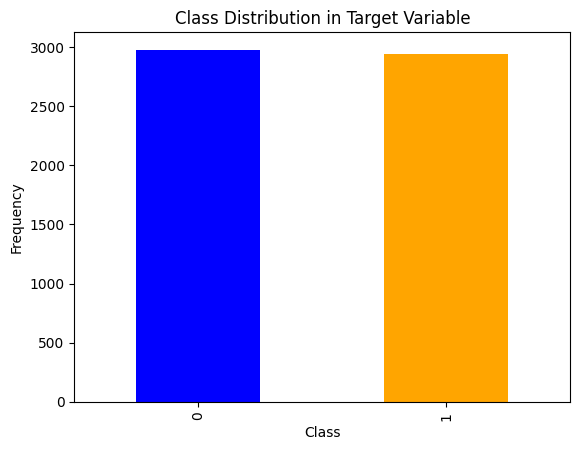

In [ ]:
# Check to distrubution after the SMOTE.
y_train_data.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution in Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Optimal k for Manhattan distance: 9
Optimal k for Euclidean distance: 9


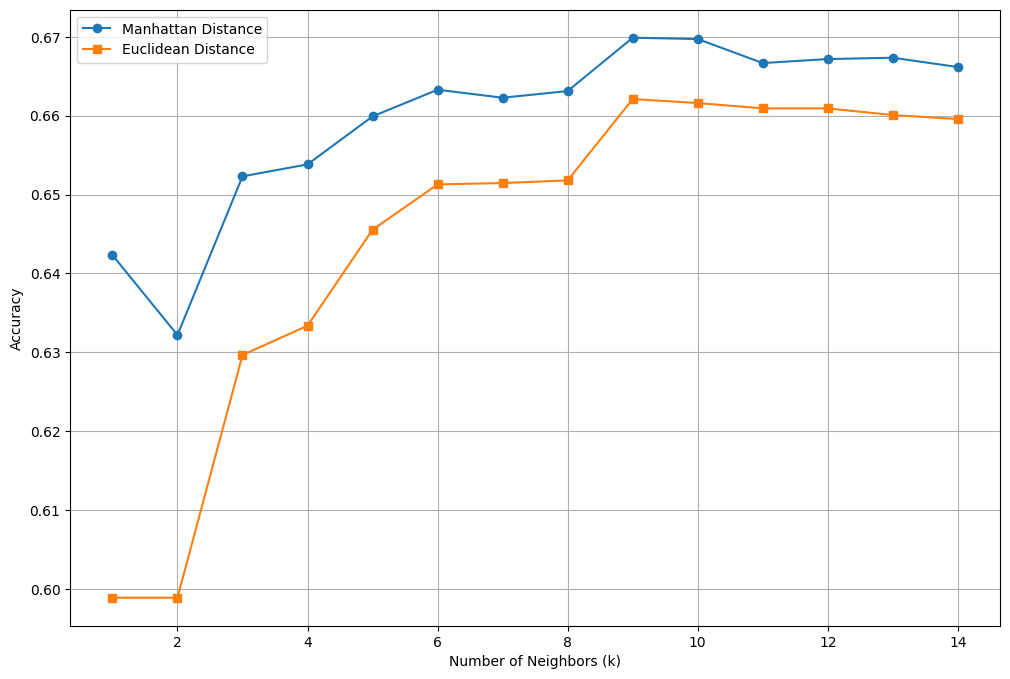

In [ ]:
# Creating KNN Model.

# Define the values for k
k_values = range(1, 15)

# Store accuracy scores for Manhattan and Euclidean distances
p_accuracy_vals = { "manhattan": [], "euclidean": [] }

# Cross-validation settings
foldnum = 5

# Cross-validation for Manhattan distance
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)


    # Calculate accuracy by using cv
    all_Scores = cross_val_score(knn_model, X_train_data, y_train_data, cv=foldnum, scoring='accuracy')
    fold_accuracy = np.mean(all_Scores)

    # Save results
    p_accuracy_vals["manhattan"].append(fold_accuracy)

# Cross-validation for Euclidean distance
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)

    # Calculate accuracy by using cv
    all_Scores = cross_val_score(knn_model, X_train_data, y_train_data, cv=foldnum, scoring='accuracy')
    fold_accuracy = np.mean(all_Scores)

    # Save results
    p_accuracy_vals["euclidean"].append(fold_accuracy)

# Determine the optimal k value
optimal_k_manhattan = k_values[np.argmax(p_accuracy_vals["manhattan"])]
optimal_k_euclidean = k_values[np.argmax(p_accuracy_vals["euclidean"])]
print(f"Optimal k for Manhattan distance: {optimal_k_manhattan}")
print(f"Optimal k for Euclidean distance: {optimal_k_euclidean}")


plt.figure(figsize=(12, 8))
plt.plot(k_values, p_accuracy_vals["manhattan"], label='Manhattan Distance', marker='o')
plt.plot(k_values, p_accuracy_vals["euclidean"], label='Euclidean Distance', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# By looking the k_accuracy values we can select optimal k value as 9.
# Also we can use manhattan distance.

knn_model = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p = 1)
knn_model.fit(X_train_data, y_train_data)
y_pred_knn = knn_model.predict(X_test_data)

print(y_pred_knn)

[1 1 0 ... 1 1 1]


## 2.2. Logistic Regression (15 Pts)
* Build and train the Logistic Regression model

In [ ]:
# Train the Logistic Regression model using the training data
logistic_regression_model = LogisticRegression(random_state=42, max_iter=5000)
logistic_regression_model.fit(X_train_data, y_train_data)

# Make predictions using the test dataset
y_predicate_logistic = logistic_regression_model.predict(X_test_data)

print(y_predicate_logistic)

[0 1 1 ... 1 0 1]



# **PART- 3: Model Evaluation (35 points)**



## 3.1 Confusion Matrix (15)

Analysis of the confusion matrices for both models:

* Plot and interpret the confusion matrices
* Display accuracy, precision, recall, and F1-score for both models



<Figure size 600x600 with 0 Axes>

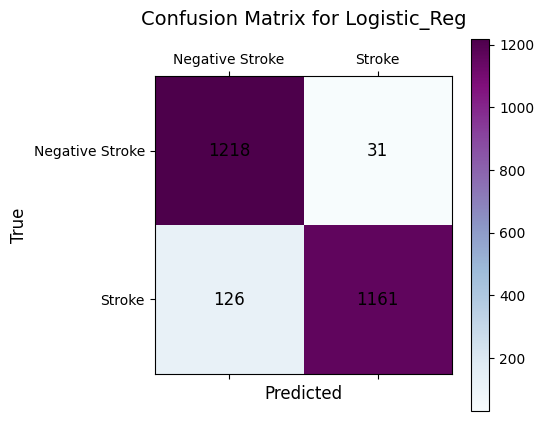

<Figure size 600x600 with 0 Axes>

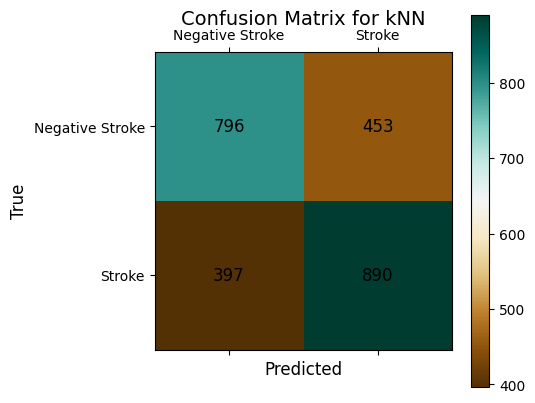

In [ ]:
# plot_matrix function to plot matrix.

def plot_matrix(c_modal, model_name, label, cmap = "Blues"):
  plt.figure(figsize=(6, 6))
  plt.matshow(c_modal, cmap=cmap)
  plt.title(f'Confusion Matrix for {model_name}', pad=20, fontsize=14)
  plt.colorbar()
  # X and Y-axis labels
  plt.xticks([0, 1], ['Negative Stroke', 'Stroke'], fontsize=10)
  plt.yticks([0, 1], ['Negative Stroke', 'Stroke'], fontsize=10)
  # Annotate the confusion matrix cells with values
  for i in range(c_modal.shape[0]):
      for j in range(c_modal.shape[1]):
          plt.text(j, i, f'{c_modal[i, j]}', ha='center', va='center', color='black', fontsize=12)
  plt.xlabel('Predicted', fontsize=12)
  plt.ylabel('True', fontsize=12)
  plt.grid(False)
  plt.show()

# Confusion matrix for logistic regression
cm_logistic = confusion_matrix(y_test_data, y_predicate_logistic)
plot_matrix(cm_logistic, "Logistic_Reg", "Logistic Regression", "BuPu")

# Confusion matrix for knn
cm_knn = confusion_matrix(y_test_data, y_pred_knn)
plot_matrix(cm_knn, "kNN", "kNN", 'BrBG')

In [ ]:
#accuracy, precision, recall, and F1-score for both models

# Logistic Regression metrics calculation
accuracy_logistic = accuracy_score(y_test_data, y_predicate_logistic)
precision_logistic = precision_score(y_test_data, y_predicate_logistic)
recall_logistic = recall_score(y_test_data, y_predicate_logistic)
f1_logistic = f1_score(y_test_data, y_predicate_logistic)

# KNN metrics calculation
accuracy_knn = accuracy_score(y_test_data, y_pred_knn)
precision_knn = precision_score(y_test_data, y_pred_knn)
recall_knn = recall_score(y_test_data, y_pred_knn)
f1_knn = f1_score(y_test_data, y_pred_knn)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_logistic)
print("Precision value:",precision_logistic)
print("Recall value:",recall_logistic)
print("F1 Score:",f1_logistic)

print()
print("KNN Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision value:",precision_knn)
print("Recall value:", recall_knn)
print("F1 Score:", f1_knn)


Logistic Regression Metrics:
Accuracy: 0.9380914826498423
Precision value: 0.9739932885906041
Recall value: 0.9020979020979021
F1 Score: 0.936668011294877

KNN Metrics:
Accuracy: 0.6648264984227129
Precision value: 0.6626954579300074
Recall value: 0.6915306915306916
F1 Score: 0.6768060836501901


## 3.2 Precision-Recall Curves (5)

Evaluate the Precision-Recall curves for both models:

* Plot and analyze the curves

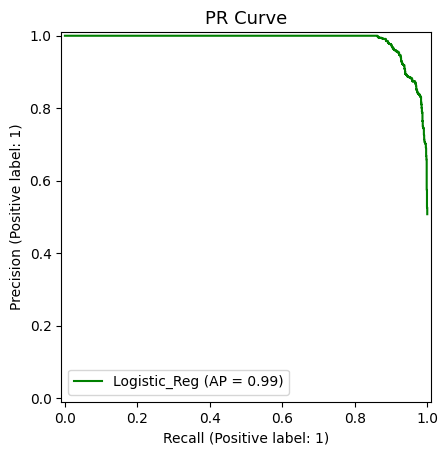

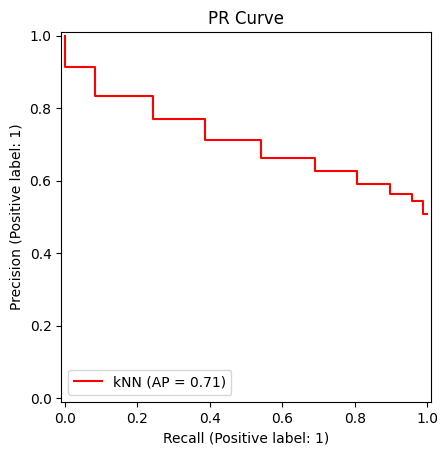

In [ ]:
# For logistic regression's curve
y_logistic_prob = logistic_regression_model.predict_proba(X_test_data)[:, 1]

# PrecisionRecallDisplay for Precision Recall Curve
PrecisionRecallDisplay.from_predictions(y_test_data, y_logistic_prob, name="Logistic_Reg", color="Green")

# Add title and grid
plt.title("PR Curve", fontsize=13)
plt.show()

# kNN Precision-Recall Curve
y_knn_prob = knn_model.predict_proba(X_test_data)[:, 1]

# PrecisionRecallDisplay for Precision Recall Curve
PrecisionRecallDisplay.from_predictions(y_test_data, y_knn_prob, name="kNN", color="red")

# Add title and grid
plt.title("PR Curve", fontsize=12)
plt.show()


## 3.3. Compare the Model (15 Pts)

Prepare a detailed evaluation report with metrics, visualizations, and comparative analysis.

* Compare the performance of kNN and Logistic Regression based on the metrics.

* Discuss which model performs better and hypothesize why.

In [ ]:
"""
The comparison of Logistic Regression and k-Nearest Neighbors (kNN) reveals clear differences in performance.
Logistic Regression significantly outperformed kNN in all metrics. It achieved an accuracy of 93.8%,
a high precision of 97.4%, and a recall of 90.2%, resulting in an impressive F1 Score of 93.7%.
Its area under the Precision-Recall Curve (PR-AUC) was also exceptional at 0.99,
indicating a very strong ability to distinguish between classes.

In contrast, KNN struggled with an accuracy of 66.5%, precision of 66.3%, recall of 69.2%,
and a relatively low F1 Score of 67.7%. The PR-AUC of 0.71 further emphasizes the limited ability of
kNN to perform well compared to Logistic Regression. This gap in performance highlights the challenges
of using kNN in this scenario, as it is heavily reliant on selecting the optimal k value
and is computationally expensive due to its brute-force nature.

Logistic Regression stands out as the better model due to its superior predictive power and practicality.
Its performance shows that it can effectively handle the given data and produce reliable predictions.
On the other hand, kNN's lower scores suggest it is less suitable for this dataset.

Finally, the Logistic Regression model performs well, but the kNN model's low performance suggests that
better feature selection, tuning of parameters, or using different models could improve the results.
We also used cross-validation to reduce the chance of overfitting,
which helps the models work better on new data and make more accurate predictions.
 """

"\nThe comparison of Logistic Regression and k-Nearest Neighbors (kNN) reveals clear differences in performance. \nLogistic Regression significantly outperformed kNN in all metrics. It achieved an accuracy of 93.8%, \na high precision of 97.4%, and a recall of 90.2%, resulting in an impressive F1 Score of 93.7%. \nIts area under the Precision-Recall Curve (PR-AUC) was also exceptional at 0.99, \nindicating a very strong ability to distinguish between classes.\n\nIn contrast, KNN struggled with an accuracy of 66.5%, precision of 66.3%, recall of 69.2%, \nand a relatively low F1 Score of 67.7%. The PR-AUC of 0.71 further emphasizes the limited ability of \nkNN to perform well compared to Logistic Regression. This gap in performance highlights the challenges \nof using kNN in this scenario, as it is heavily reliant on selecting the optimal k value\nand is computationally expensive due to its brute-force nature.\n\nLogistic Regression stands out as the better model due to its superior pred

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw4.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.